In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os 
import zipfile
import matplotlib.pyplot as plt

In this week we discuss about one of the image processing tool of tensorflow
which is ImageGenerator.

First we should download the dataset we want to work with then we seperated our data into two folder(training, validation) and then put each image into specific folder with the name of the class and then pass all this data to ImageGenerator.

Now we download and unzip our dataset.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-06-02 12:06:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  44.1MB/s    in 3.2s    

2021-06-02 12:06:23 (44.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:
train_horse_dir = os.path.join('/tmp/horse-or-human', 'horses')
train_human_dir = os.path.join('/tmp/horse-or-human', 'humans')

print(os.listdir(train_horse_dir))
print(os.listdir(train_human_dir))
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))

['horse31-0.png', 'horse34-3.png', 'horse08-9.png', 'horse25-2.png', 'horse07-2.png', 'horse45-9.png', 'horse38-3.png', 'horse33-1.png', 'horse10-2.png', 'horse15-2.png', 'horse15-3.png', 'horse38-4.png', 'horse16-9.png', 'horse23-1.png', 'horse16-8.png', 'horse39-3.png', 'horse35-4.png', 'horse26-6.png', 'horse01-5.png', 'horse27-8.png', 'horse09-1.png', 'horse40-6.png', 'horse09-4.png', 'horse20-7.png', 'horse47-9.png', 'horse22-0.png', 'horse32-3.png', 'horse47-1.png', 'horse26-8.png', 'horse11-7.png', 'horse32-7.png', 'horse16-4.png', 'horse05-5.png', 'horse23-0.png', 'horse12-3.png', 'horse08-6.png', 'horse23-9.png', 'horse21-8.png', 'horse44-0.png', 'horse04-6.png', 'horse16-0.png', 'horse33-4.png', 'horse40-8.png', 'horse06-8.png', 'horse50-6.png', 'horse24-9.png', 'horse02-7.png', 'horse27-6.png', 'horse15-5.png', 'horse07-5.png', 'horse39-8.png', 'horse28-1.png', 'horse24-1.png', 'horse24-8.png', 'horse03-2.png', 'horse45-7.png', 'horse47-3.png', 'horse22-2.png', 'horse40-3.pn

In [5]:
train_horse_names = os.listdir(train_horse_dir)
train_humans_names = os.listdir(train_human_dir)

Now for visualizing our data we use 



```
import matplotlib.pyplot as plt
import matplotlib.image as npimg
```



In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as npimg

nrows = 4
ncols = 4

pic_index = 0

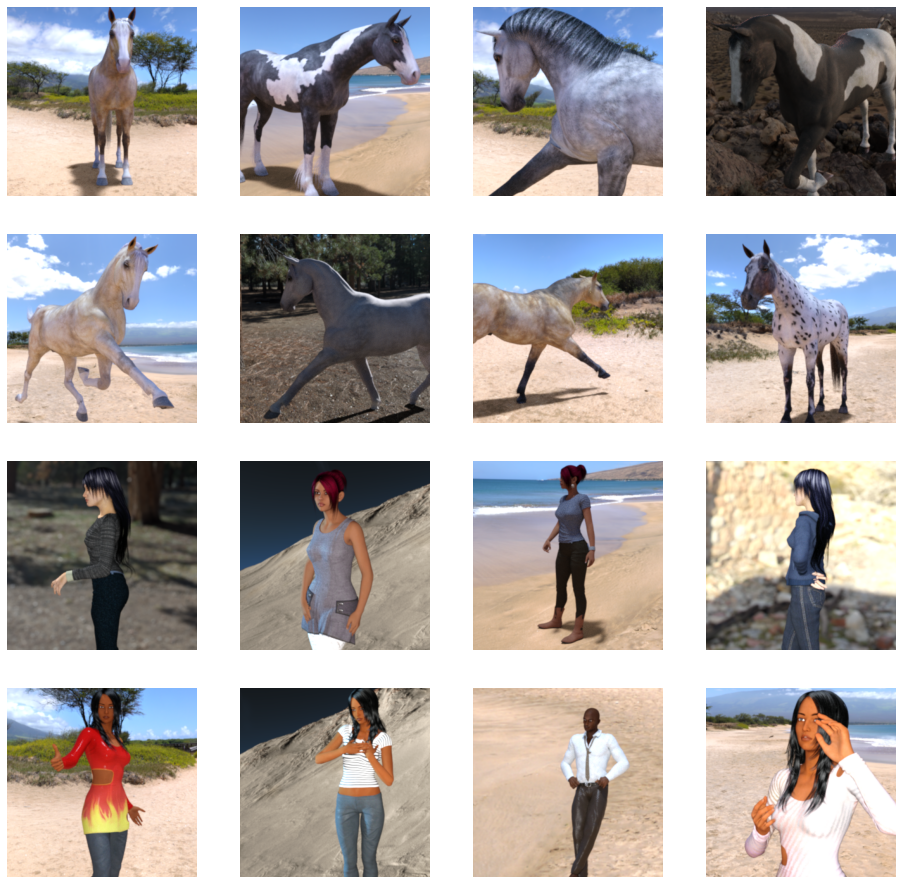

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_humans_pix = [os.path.join(train_human_dir, fname) for fname in train_humans_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_humans_pix):
    sp = plt.subplot(ncols, nrows, i + 1)
    sp.axis('off')

    img = npimg.imread(img_path)
    plt.imshow(img)

plt.show()


Now We specify our model...

In [8]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=(300, 300, 3), activation='relu'),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=512, activation='relu'),
                                 keras.layers.Dense(units=1, activation='sigmoid')                                 
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In This Section we define our image generator and create a image generator instances and the directed to the data folder to preprocess our data for this model.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    directory='/tmp/horse-or-human',
    target_size=(300, 300),
    class_mode='binary',
    batch_size=128
)

Found 1027 images belonging to 2 classes.


Now we use **fit_generator** to fit on the prev generated data and train our model.

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 39s 998ms/step - loss: 0.7695 - accuracy: 0.5706
Epoch 2/15
8/8 [==============================] - 6s 783ms/step - loss: 0.6704 - accuracy: 0.7207
Epoch 3/15
8/8 [==============================] - 6s 803ms/step - loss: 0.3497 - accuracy: 0.8721
Epoch 4/15
8/8 [==============================] - 6s 698ms/step - loss: 0.5183 - accuracy: 0.8676
Epoch 5/15
8/8 [==============================] - 6s 682ms/step - loss: 0.2194 - accuracy: 0.9143
Epoch 6/15
8/8 [==============================] - 6s 691ms/step - loss: 0.0859 - accuracy: 0.9633
Epoch 7/15
8/8 [==============================] - 6s 697ms/step - loss: 0.1822 - accuracy: 0.9410
Epoch 8/15
8/8 [==============================] - 6s 810ms/step - loss: 0.0267 - accuracy: 0.9922
Epoch 9/15
8/8 [==============================] - 6s 675ms/step - loss: 0.3973 - accuracy: 0.8943
Epoch 10/15
8/8 [==============================] - 6s 696ms/step - loss: 0.0575 - accuracy: 0.9811
Epoch 11/15
8/8 [=

Now we need to test our model on new data from internet

In [15]:
from google.colab import files
import numpy as np
from keras.preprocessing import image


For test our model...

In [16]:
# uploaded = files.upload()

# for fn in uploaded.keys():
#     path = os.path.join('/content', fn)
#     img = image.load_img(path, target_size=(300, 300))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     print('The Probability of Class is : {}'.format(classes[0] * 100))
#     if classes[0]>0.5:
#         print(fn + ' is human.')
#     else:
#         print(fn + ' is horse.')
#     os.remove(path)

You Should see the course 1 for extra information about the validation set and the other methods for training.